# Análise de Tratamentos DIATEX vs. TESTEMUNHA

Este notebook analisa os dados do banco SQLite gerado pelo script `extract_tables.py`, focando na view `comparacao_lote_idade_tratamento`. O objetivo é comparar a eficácia dos tratamentos `DIATEX` e `TESTEMUNHA` na redução de `NH3` ao longo dos dias de vida do lote (`idade_lote`).

**Estrutura do Notebook**:
1. Importar bibliotecas.
2. Conectar ao banco SQLite.
3. Explorar tabelas e views.
4. Carregar dados da view.
5. Calcular estatísticas descritivas.
6. Criar visualizações (gráficos de linha e barras).
7. Analisar a hipótese.
8. Exportar resultados.

In [1]:
# Célula 1: Importar bibliotecas necessárias
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurar estilo dos gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Diretório de saída para gráficos e tabelas
output_dir = os.path.join(os.getcwd(), 'output')
os.makedirs(output_dir, exist_ok=True)

print('Bibliotecas importadas e diretório de saída criado.')

Bibliotecas importadas e diretório de saída criado.


In [2]:
# Célula 2: Conectar ao banco SQLite
# Caminho do arquivo .db
db_path = os.path.join(os.getcwd(), 'database', 'TESTE_DIATEX.db')

# Verificar se o arquivo existe
if not os.path.exists(db_path):
    raise FileNotFoundError(f'Arquivo {db_path} não encontrado.')

# Conectar ao banco
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

print(f'Conectado ao banco: {db_path}')

Conectado ao banco: C:\Users\user\Data Science\ADOX - Teste Diatex\database\TESTE_DIATEX.db


In [3]:
# Célula 3: Explorar tabelas e views
# Listar todas as tabelas e views no banco
cursor.execute("SELECT name, type FROM sqlite_master WHERE type IN ('table', 'view');")
schema = cursor.fetchall()

# Exibir tabelas e views
print('Tabelas e Views no banco:')
for name, type_ in schema:
    print(f'- {name} ({type_})')

# Verificar a estrutura da view comparacao_lote_idade_tratamento
cursor.execute("PRAGMA table_info(comparacao_lote_idade_tratamento);")
columns = cursor.fetchall()

print('\nEstrutura da view comparacao_lote_idade_tratamento:')
for col in columns:
    print(f'- {col[1]} ({col[2]})')

# Consultar as colunas da tabela tratamentos para registrar as variáveis
conn = sqlite3.connect(r'C:\Users\user\Data Science\ADOX - Teste Diatex\database\TESTE_DIATEX.db')
cursor = conn.cursor()  # Recriar o cursor para a nova conexão

cursor.execute("PRAGMA table_info(tratamentos);")
tratamentos_columns = cursor.fetchall()

print('\nEstrutura da tabela tratamentos:')
for col in tratamentos_columns:
    print(f'- {col[1]} ({col[2]})')
    
# de um select na tabela tratamentos
query = "SELECT * FROM tratamentos LIMIT 5;"
tratamentos_df = pd.read_sql_query(query, conn)
print('\nExemplo de dados da tabela tratamentos:')
print(tratamentos_df)

# Verificar a estrutura da tabela medicoes
cursor.execute("PRAGMA table_info(medicoes);")
medicoes_columns = cursor.fetchall()

print('\nEstrutura da tabela medicoes:')
for col in medicoes_columns:
    print(f'- {col[1]} ({col[2]})')

# Exibir as primeiras 10 linhas da tabela medicoes
query = "SELECT * FROM medicoes LIMIT 10;"
medicoes_df = pd.read_sql_query(query, conn)
print('\nExemplo de dados da tabela medicoes:')
display(medicoes_df)

# Fechar a conexão
conn.close()
print('Conexão com o banco fechada.')
        

Tabelas e Views no banco:
- medicoes (table)
- stats_por_data (view)
- stats_por_arquivo (view)
- tendencias_por_hora (view)
- tendencias_por_hora_aviario (view)
- alertas_nh3_elevado (view)
- comparacao_tratamentos_por_data (view)
- comparacao_tratamentos_por_hora (view)
- comparacao_tratamentos_geral (view)
- comparacao_tratamentos_por_idade_lote (view)
- tratamentos (table)
- comparacao_tratamentos_linhagem (view)
- comparacao_lote_idade_tratamento (view)

Estrutura da view comparacao_lote_idade_tratamento:
- ID_Aviario (TEXT)
- teste (VARCHAR(512))
- idade_lote (INTEGER)
- media_nh3 ()
- num_registros ()

Estrutura da tabela tratamentos:
- aviario (VARCHAR(512))
- lote_composto (VARCHAR(512))
- bateria_teste (INT)
- data_alojamento (TEXT)
- data_retirada (TEXT)
- linhagem (VARCHAR(512))
- teste (VARCHAR(512))
- produtor (VARCHAR(512))
- n_cama (INT)
- aves_alojadas (INT)
- vazio (INT)
- peso_alojamento (INT)
- peso_7d (INT)
- peso_14d (INT)
- peso_21d (INT)
- peso_28d (INT)
- peso_

,Fecha,Hora,NH3,Rango_NH3,Temperatura,Rango_Temperatura,Humedad,Rango_Humedad,Nome_Arquivo,ID_Aviario,lote_composto,teste,idade_lote,n_cama
0,2025-05-12,15:16,10,100-0 ppm,30.8,30-0 °C,45,100-0 %,aviario_1203_pt1,aviario_1203,1203-24,DIATEX,0,None
1,2025-05-12,17:10,15,20-0 ppm,29.8,35-0 °C,54,90-40 %,aviario_1203_pt1,aviario_1203,1203-24,DIATEX,0,None
2,2025-05-12,17:15,14,20-0 ppm,30.0,35-0 °C,52,90-40 %,aviario_1203_pt1,aviario_1203,1203-24,DIATEX,0,None
3,2025-05-12,17:20,12,20-0 ppm,30.0,35-0 °C,52,90-40 %,aviario_1203_pt1,aviario_1203,1203-24,DIATEX,0,None
4,2025-05-12,17:25,12,20-0 ppm,30.3,35-0 °C,51,90-40 %,aviario_1203_pt1,aviario_1203,1203-24,DIATEX,0,None
5,2025-05-12,17:30,14,20-0 ppm,30.3,35-0 °C,52,90-40 %,aviario_1203_pt1,aviario_1203,1203-24,DIATEX,0,None
6,2025-05-12,17:35,14,20-0 ppm,30.5,35-0 °C,52,90-40 %,aviario_1203_pt1,aviario_1203,1203-24,DIATEX,0,None
7,2025-05-12,17:40,12,20-0 ppm,30.5,35-0 °C,52,90-40 %,aviario_1203_pt1,aviario_1203,1203-24,DIATEX,0,None
8,2025-05-12,17:45,12,20-0 ppm,30.3,35-0 °C,51,90-40 %,aviario_1203_pt1,aviario_1203,1203-24,DIATEX,0,None
9,2025-05-12,17:50,12,20-0 ppm,30.3,35-0 °C,52,90-40 %,aviario_1203_pt1,aviario_1203,1203-24,DIATEX,0,None


Conexão com o banco fechada.


In [4]:
# Célula 4: Carregar dados da view
# Query para selecionar todos os dados da view

# Consultar as colunas da tabela tratamentos para registrar as variáveis
conn = sqlite3.connect(r'C:\Users\user\Data Science\ADOX - Teste Diatex\database\TESTE_DIATEX.db')
cursor = conn.cursor()  # Recriar o cursor para a nova conexão

query = 'SELECT * FROM comparacao_lote_idade_tratamento;'
df = pd.read_sql_query(query, conn)

# Exibir as primeiras linhas
print('Primeiras linhas do DataFrame:')
display(df.head(10))

# Verificar tipos de dados e valores nulos
print('\nInformações do DataFrame:')
df.info()

Primeiras linhas do DataFrame:


,ID_Aviario,teste,idade_lote,media_nh3,num_registros
0,aviario_1203,DIATEX,0,10.25,648
1,aviario_1203,DIATEX,1,10.13,1034
2,aviario_1203,DIATEX,2,7.81,1058
3,aviario_1203,DIATEX,3,5.57,1041
4,aviario_1203,DIATEX,4,6.84,711
5,aviario_1203,DIATEX,5,3.57,641
6,aviario_1203,DIATEX,6,3.09,850
7,aviario_1203,DIATEX,7,3.19,650
8,aviario_1203,DIATEX,8,3.04,733
9,aviario_1203,DIATEX,9,2.81,790



Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID_Aviario     108 non-null    object 
 1   teste          108 non-null    object 
 2   idade_lote     108 non-null    int64  
 3   media_nh3      108 non-null    float64
 4   num_registros  108 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.3+ KB


Estatísticas descritivas por teste e idade_lote:


,teste,idade_lote,media_nh3,min_nh3,max_nh3,total_registros
0,DIATEX,0,10.25,10.25,10.25,648
1,DIATEX,1,10.13,10.13,10.13,1034
2,DIATEX,2,7.81,7.81,7.81,1058
3,DIATEX,3,5.57,5.57,5.57,1041
4,DIATEX,4,6.84,6.84,6.84,711
...,...,...,...,...,...,...
103,TESTEMUNHA,76,3.47,3.47,3.47,368
104,TESTEMUNHA,77,3.09,3.09,3.09,940
105,TESTEMUNHA,78,2.48,2.48,2.48,940
106,TESTEMUNHA,79,1.50,1.50,1.50,950


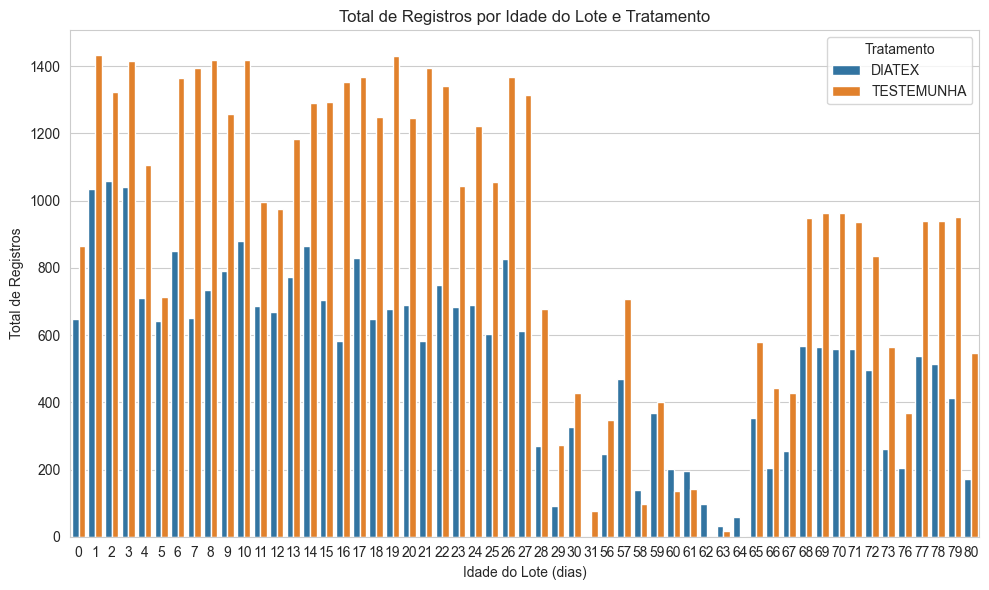

Tabela de estatísticas salva em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/estatisticas_descritivas.csv


In [ ]:
def new_func():
    # Célula 5: Estatísticas descritivas
# Resumo por teste e idade_lote
    stats = df.groupby(['teste', 'idade_lote']).agg({
    'media_nh3': ['mean', 'min', 'max'],
    'num_registros': 'sum'
}).reset_index()

# Renomear colunas para clareza
    stats.columns = ['teste', 'idade_lote', 'media_nh3', 'min_nh3', 'max_nh3', 'total_registros']

    print('Estatísticas descritivas por teste e idade_lote:')
    display(stats)

# Gráfico de barras: Total de registros por idade_lote e tratamento
    plt.figure(figsize=(10, 6))
    sns.barplot(data=stats, x='idade_lote', y='total_registros', hue='teste')
    plt.title('Total de Registros por Idade do Lote e Tratamento')
    plt.xlabel('Idade do Lote (dias)')
    plt.ylabel('Total de Registros')
    plt.legend(title='Tratamento')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'estatisticas_total_registros_barras.png'))
    plt.show()

# Salvar tabela em CSV
    stats.to_csv(os.path.join(output_dir, 'estatisticas_descritivas.csv'), index=False, encoding='utf-8-sig')
    print(f'Tabela de estatísticas salva em: {output_dir}/estatisticas_descritivas.csv')

new_func()

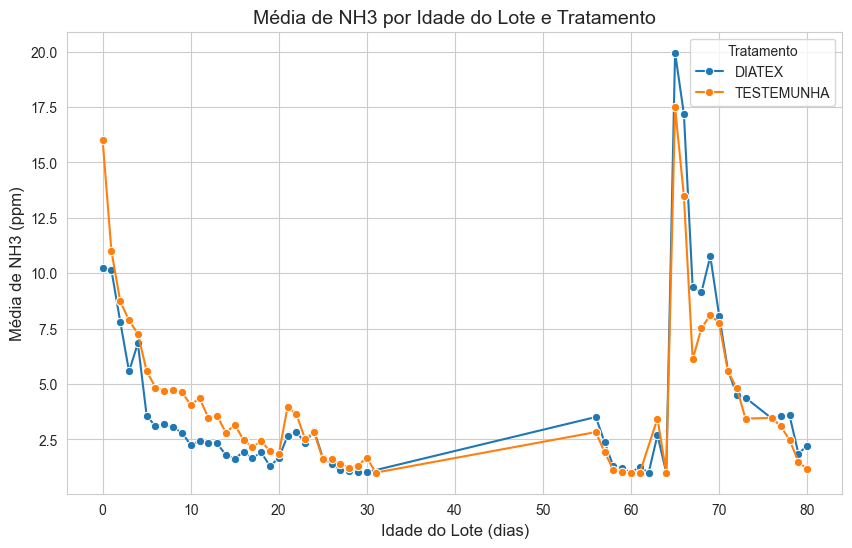

Gráfico salvo em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/media_nh3_por_idade_lote.png


In [6]:
# Célula 6: Gráfico de linha - media_nh3 por idade_lote
# Criar gráfico de linha para comparar media_nh3
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='idade_lote', y='media_nh3', hue='teste', marker='o')

# Configurar título e rótulos
plt.title('Média de NH3 por Idade do Lote e Tratamento', fontsize=14)
plt.xlabel('Idade do Lote (dias)', fontsize=12)
plt.ylabel('Média de NH3 (ppm)', fontsize=12)
plt.legend(title='Tratamento')

# Salvar gráfico
plt.savefig(os.path.join(output_dir, 'media_nh3_por_idade_lote.png'))
plt.show()
print(f'Gráfico salvo em: {output_dir}/media_nh3_por_idade_lote.png')

C:\Users\user\AppData\Local\Temp\ipykernel_4204\2546368522.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Tratamento')


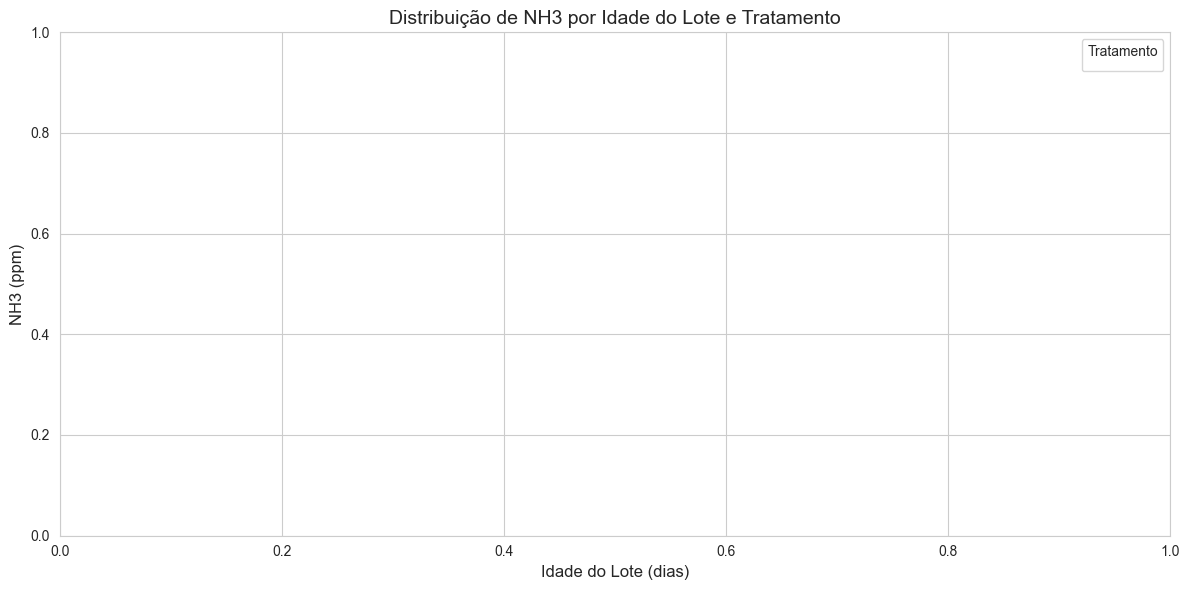

Boxplot salvo em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/boxplot_nh3_idade_tratamento.png


In [7]:
# Boxplot do teor de amônia (NH3) por idade_lote e tratamento a partir da tabela medicoes

# Reabrir conexão se necessário
if conn is None:
    conn = sqlite3.connect(db_path)

# Carregar dados diretamente da tabela medicoes
query_boxplot = """
SELECT 
    m.idade_lote,
    m.NH3,
    t.teste
FROM medicoes m
JOIN tratamentos t ON m.Nome_Arquivo = t.aviario
WHERE m.idade_lote >= 0 AND m.NH3 IS NOT NULL
"""
df_boxplot = pd.read_sql_query(query_boxplot, conn)

# Gráfico de boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_boxplot, x='idade_lote', y='NH3', hue='teste')
plt.title('Distribuição de NH3 por Idade do Lote e Tratamento', fontsize=14)
plt.xlabel('Idade do Lote (dias)', fontsize=12)
plt.ylabel('NH3 (ppm)', fontsize=12)
plt.legend(title='Tratamento')
plt.tight_layout()

# Salvar gráfico
plt.savefig(os.path.join(output_dir, 'boxplot_nh3_idade_tratamento.png'))
plt.show()
print(f'Boxplot salvo em: {output_dir}/boxplot_nh3_idade_tratamento.png')

C:\Users\user\AppData\Local\Temp\ipykernel_4204\4138394876.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Tratamento')


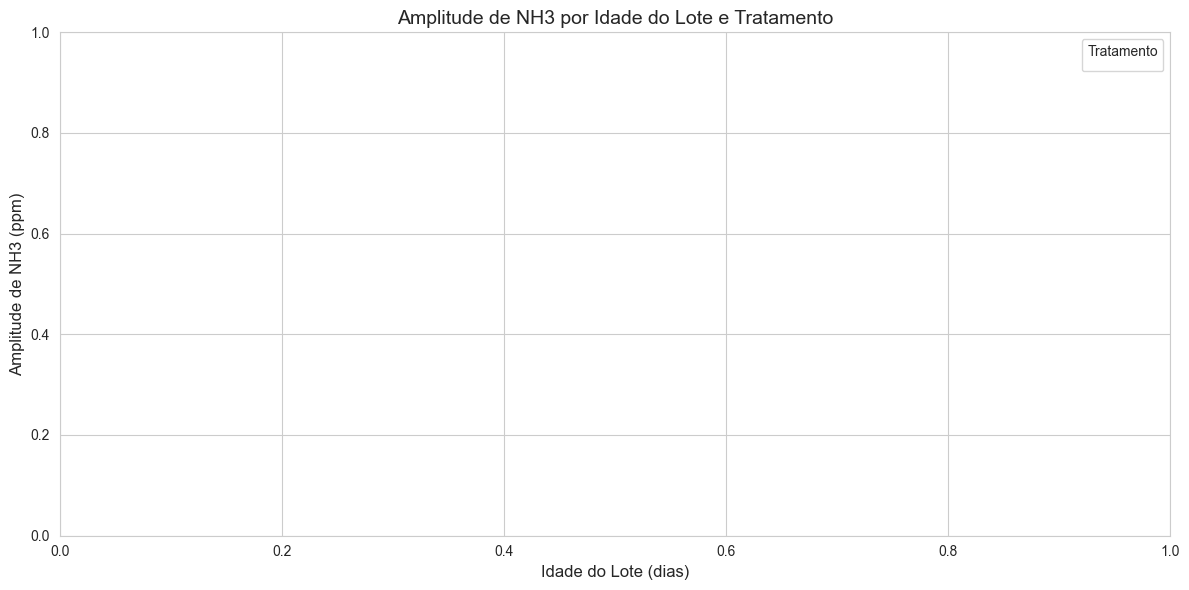

Gráfico salvo em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/amplitude_nh3_idade_tratamento.png
Tabela salva em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/amplitude_nh3_idade_tratamento.csv


In [8]:
# Gráfico de barras: Amplitude de NH3 por idade_lote e tratamento

# Query para calcular amplitude (máximo - mínimo) de NH3 por idade_lote e tratamento
query_amplitude = """
SELECT 
    m.idade_lote,
    t.teste,
    MAX(m.NH3) - MIN(m.NH3) AS amplitude_nh3
FROM medicoes m
JOIN tratamentos t ON m.Nome_Arquivo = t.aviario
WHERE m.idade_lote >= 0 AND m.NH3 IS NOT NULL
GROUP BY m.idade_lote, t.teste
ORDER BY m.idade_lote, t.teste
"""
df_amplitude = pd.read_sql_query(query_amplitude, conn)

# Gráfico de barras agrupado
plt.figure(figsize=(12, 6))
sns.barplot(data=df_amplitude, x='idade_lote', y='amplitude_nh3', hue='teste')
plt.title('Amplitude de NH3 por Idade do Lote e Tratamento', fontsize=14)
plt.xlabel('Idade do Lote (dias)', fontsize=12)
plt.ylabel('Amplitude de NH3 (ppm)', fontsize=12)
plt.legend(title='Tratamento')
plt.tight_layout()

# Salvar gráfico
plt.savefig(os.path.join(output_dir, 'amplitude_nh3_idade_tratamento.png'))
plt.show()
print(f'Gráfico salvo em: {output_dir}/amplitude_nh3_idade_tratamento.png')

# Salvar tabela em CSV
df_amplitude.to_csv(os.path.join(output_dir, 'amplitude_nh3_idade_tratamento.csv'), index=False, encoding='utf-8-sig')
print(f'Tabela salva em: {output_dir}/amplitude_nh3_idade_tratamento.csv')

In [9]:
# Célula 6: Gráfico de linha - media_nh3 por idade_lote agrupado por aviário com sufixos e marcadores distintos
# Criar uma nova coluna 'legenda' com sufixos (D) para DIATEX e (T) para TESTEMUNHA
df['legenda'] = df.apply(lambda row: f"{row['Nome_Arquivo']} (D)" if row['teste'] == 'DIATEX' else f"{row['Nome_Arquivo']} (T)", axis=1)

# Criar gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='idade_lote', y='media_nh3', hue='legenda', style='teste', markers={'DIATEX': 'o', 'TESTEMUNHA': 's'}, markersize=10)

# Configurar título e rótulos
plt.title('Média de NH3 por Idade do Lote e Aviário', fontsize=14)
plt.xlabel('Idade do Lote (dias)', fontsize=12)
plt.ylabel('Média de NH3 (ppm)', fontsize=12)
plt.legend(title='Aviário')

# Salvar gráfico
plt.savefig(os.path.join(output_dir, 'media_nh3_por_idade_lote_aviario_sufixos.png'))
plt.show()
print(f'Gráfico salvo em: {output_dir}/media_nh3_por_idade_lote_aviario_sufixos.png')

KeyError: 'Nome_Arquivo'

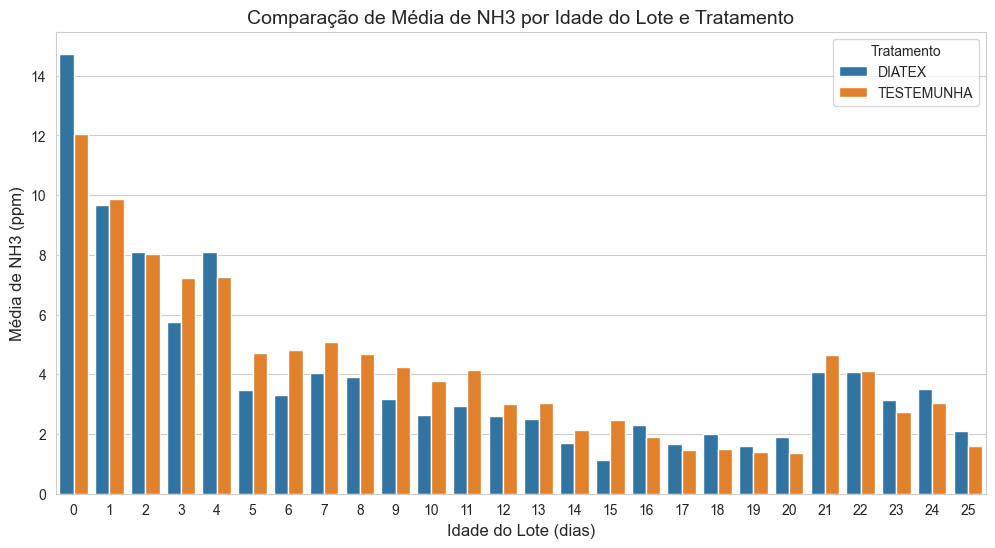

Gráfico salvo em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/media_nh3_barras.png


In [ ]:
# Célula 7: Gráfico de barras - media_nh3 por teste e idade_lote
# Criar gráfico de barras agrupado
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='idade_lote', y='media_nh3', hue='teste')

# Configurar título e rótulos
plt.title('Comparação de Média de NH3 por Idade do Lote e Tratamento', fontsize=14)
plt.xlabel('Idade do Lote (dias)', fontsize=12)
plt.ylabel('Média de NH3 (ppm)', fontsize=12)
plt.legend(title='Tratamento')

# Salvar gráfico
plt.savefig(os.path.join(output_dir, 'media_nh3_barras.png'))
plt.show()
print(f'Gráfico salvo em: {output_dir}/media_nh3_barras.png')

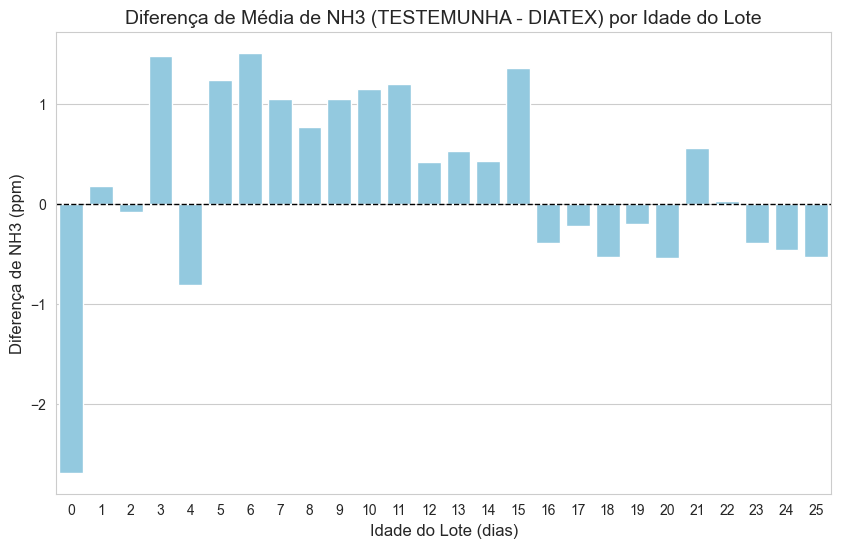

Gráfico salvo em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/diferenca_nh3.png
Tabela de diferenças (TESTEM Semantic Error: Expected an expression, but found: )UNHA - DIATEX):


teste,idade_lote,DIATEX,TESTEMUNHA,diferenca_nh3
0,0,14.74,12.05,-2.69
1,1,9.68,9.86,0.18
2,2,8.11,8.03,-0.08
3,3,5.74,7.22,1.48
4,4,8.08,7.27,-0.81
5,5,3.48,4.72,1.24
6,6,3.30,4.81,1.51
7,7,4.04,5.09,1.05
8,8,3.90,4.67,0.77
9,9,3.18,4.23,1.05


In [ ]:
# Célula 8: Gráfico de barras - Diferença de media_nh3
# Pivotar dados para calcular diferença
pivot_df = df.pivot(index='idade_lote', columns='teste', values='media_nh3').reset_index()
pivot_df['diferenca_nh3'] = pivot_df['TESTEMUNHA'] - pivot_df['DIATEX']

# Criar gráfico de barras para a diferença
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_df, x='idade_lote', y='diferenca_nh3', color='skyblue')

# Configurar título e rótulos
plt.title('Diferença de Média de NH3 (TESTEMUNHA - DIATEX) por Idade do Lote', fontsize=14)
plt.xlabel('Idade do Lote (dias)', fontsize=12)
plt.ylabel('Diferença de NH3 (ppm)', fontsize=12)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Salvar gráfico
plt.savefig(os.path.join(output_dir, 'diferenca_nh3.png'))
plt.show()
print(f'Gráfico salvo em: {output_dir}/diferenca_nh3.png')

# Exibir tabela de diferenças
print('Tabela de diferenças (TESTEM Semantic Error: Expected an expression, but found: )UNHA - DIATEX):')
display(pivot_df[['idade_lote', 'DIATEX', 'TESTEMUNHA', 'diferenca_nh3']])

In [ ]:
# Célula 9: Análise da hipótese
# Filtrar dados para idade_lote
df_hypothesis = df[df['idade_lote'] >= 0]

# Resumo por teste
hypothesis_stats = df_hypothesis.groupby('teste').agg({
    'media_nh3': 'mean',
    'num_registros': 'sum'
}).reset_index()

print('Resumo para idade_lote >= 3:')
display(hypothesis_stats)

# Calcular diferença média
if len(hypothesis_stats) == 2:
    diff_nh3 = hypothesis_stats[hypothesis_stats['teste'] == 'TESTEMUNHA']['media_nh3'].iloc[0] - \
               hypothesis_stats[hypothesis_stats['teste'] == 'DIATEX']['media_nh3'].iloc[0]
    print(f'Diferença média de NH3 (TESTEMUNHA - DIATEX) para idade_lote >= 3: {diff_nh3:.2f} ppm')
else:
    print('Dados insuficientes para calcular a diferença.')

# Salvar resumo em CSV
hypothesis_stats.to_csv(os.path.join(output_dir, 'hipótese_idade_lote_3.csv'), index=False, encoding='utf-8-sig')
print(f'Resumo da hipótese salvo em: {output_dir}/hipótese_idade_lote_3.csv')

Resumo para idade_lote >= 3:


,teste,media_nh3,num_registros
0,DIATEX,4.002692,4761
1,TESTEMUNHA,4.238077,10279


Diferença média de NH3 (TESTEMUNHA - DIATEX) para idade_lote >= 3: 0.24 ppm
Resumo da hipótese salvo em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/hipótese_idade_lote_3.csv


In [ ]:
# Célula 10: Fechar conexão com o banco
conn.close()
print('Conexão com o banco fechada.')

Conexão com o banco fechada.


Média de NH3 por hora, aviário e tratamento:


,hora_do_dia,Nome_Arquivo,teste,media_nh3,num_registros,legenda
0,00,aviario_1203,DIATEX,4.30,214,aviario_1203 (D)
1,00,aviario_1204,TESTEMUNHA,4.23,446,aviario_1204 (T)
2,01,aviario_1203,DIATEX,4.30,203,aviario_1203 (D)
3,01,aviario_1204,TESTEMUNHA,4.20,452,aviario_1204 (T)
4,02,aviario_1203,DIATEX,4.47,203,aviario_1203 (D)
5,02,aviario_1204,TESTEMUNHA,4.20,444,aviario_1204 (T)
6,03,aviario_1203,DIATEX,4.53,205,aviario_1203 (D)
7,03,aviario_1204,TESTEMUNHA,4.33,427,aviario_1204 (T)
8,04,aviario_1203,DIATEX,4.81,199,aviario_1203 (D)
9,04,aviario_1204,TESTEMUNHA,4.73,437,aviario_1204 (T)


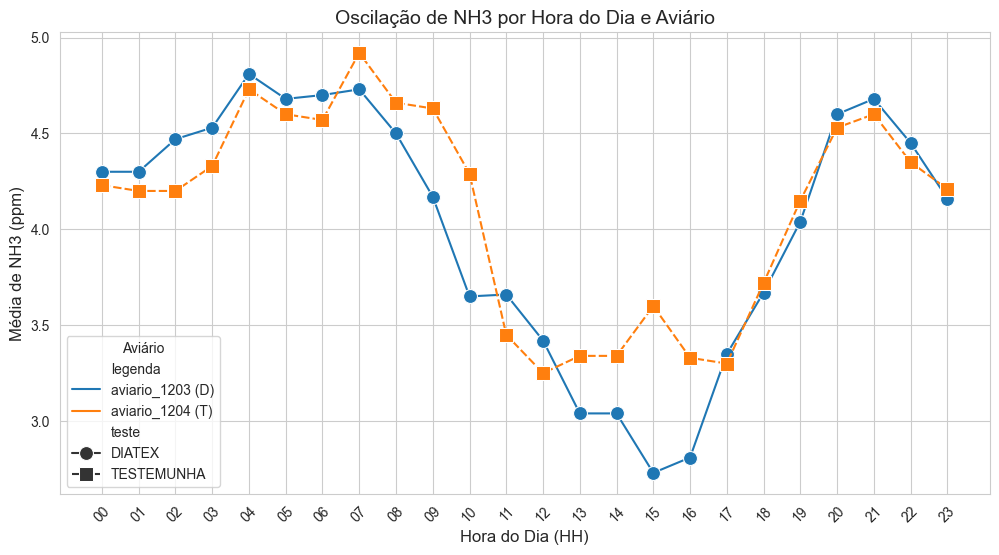

Gráfico salvo em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/nh3_oscilacao_por_hora.png
Tabela salva em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/nh3_por_hora.csv
Conexão com o banco fechada.


In [ ]:
# Célula 11: Gráfico de linha - Oscilação de NH3 por hora do dia, por aviário e tratamento
# Reabrir a conexão com o banco SQLite
conn = sqlite3.connect(r'C:\Users\user\Data Science\ADOX - Teste Diatex\database\TESTE_DIATEX.db')

# Query SQL para extrair hora (HH) e calcular média de NH3
query = """
SELECT 
    SUBSTR(m.Hora, 1, 2) AS hora_do_dia,
    m.Nome_Arquivo,
    t.teste,
    ROUND(AVG(m.NH3), 2) AS media_nh3,
    COUNT(*) AS num_registros
FROM medicoes m
JOIN tratamentos t ON m.Nome_Arquivo = t.aviario
GROUP BY SUBSTR(m.Hora, 1, 2), m.Nome_Arquivo, t.teste
ORDER BY hora_do_dia, m.Nome_Arquivo;
"""

# Executar query e carregar em DataFrame
df_hora = pd.read_sql_query(query, conn)

# Criar coluna 'legenda' com sufixos (D) para DIATEX e (T) para TESTEMUNHA
df_hora['legenda'] = df_hora.apply(lambda row: f"{row['Nome_Arquivo']} (D)" if row['teste'] == 'DIATEX' else f"{row['Nome_Arquivo']} (T)", axis=1)

# Exibir tabela resumida
print('Média de NH3 por hora, aviário e tratamento:')
display(df_hora)

# Criar gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hora, x='hora_do_dia', y='media_nh3', hue='legenda', style='teste', markers={'DIATEX': 'o', 'TESTEMUNHA': 's'}, markersize=10)

# Configurar título e rótulos
plt.title('Oscilação de NH3 por Hora do Dia e Aviário', fontsize=14)
plt.xlabel('Hora do Dia (HH)', fontsize=12)
plt.ylabel('Média de NH3 (ppm)', fontsize=12)
plt.legend(title='Aviário')
plt.xticks(rotation=45)

# Salvar gráfico
plt.savefig(os.path.join(output_dir, 'nh3_oscilacao_por_hora.png'))
plt.show()
print(f'Gráfico salvo em: {output_dir}/nh3_oscilacao_por_hora.png')

# Salvar tabela em CSV
df_hora.to_csv(os.path.join(output_dir, 'nh3_por_hora.csv'), index=False, encoding='utf-8-sig')
print(f'Tabela salva em: {output_dir}/nh3_por_hora.csv')

# Fechar a conexão
conn.close()
print('Conexão com o banco fechada.')

Média de NH3 por idade do lote, aviário e número de camas:


,Nome_Arquivo,teste,n_cama,idade_lote,media_nh3,num_registros,legenda
0,aviario_1203,DIATEX,6,0,14.74,84,aviario_1203 (D)
1,aviario_1203,DIATEX,6,1,9.68,282,aviario_1203 (D)
2,aviario_1203,DIATEX,6,2,8.11,289,aviario_1203 (D)
3,aviario_1203,DIATEX,6,3,5.74,281,aviario_1203 (D)
4,aviario_1203,DIATEX,6,4,8.08,181,aviario_1203 (D)
5,aviario_1203,DIATEX,6,5,3.48,92,aviario_1203 (D)
6,aviario_1203,DIATEX,6,6,3.30,230,aviario_1203 (D)
7,aviario_1203,DIATEX,6,7,4.04,157,aviario_1203 (D)
8,aviario_1203,DIATEX,6,8,3.90,147,aviario_1203 (D)
9,aviario_1203,DIATEX,6,9,3.18,155,aviario_1203 (D)


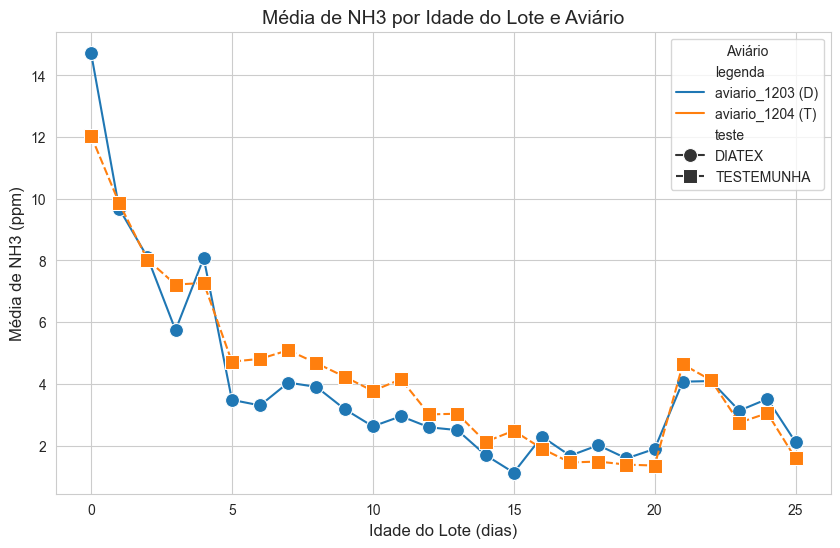

Gráfico salvo em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/nh3_por_idade_camas.png
Tabela salva em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/nh3_por_idade_camas.csv
Conexão com o banco fechada.


In [ ]:
# Célula 11: Gráfico de linha - Análise de NH3 por idade do lote e número de camas
# Reabrir a conexão com o banco SQLite
conn = sqlite3.connect(r'C:\Users\user\Data Science\ADOX - Teste Diatex\database\TESTE_DIATEX.db')

# Query para calcular média de NH3 por idade_lote, aviário e n_cama
query = """
SELECT 
    m.Nome_Arquivo,
    t.teste,
    m.n_cama,
    m.idade_lote,
    ROUND(AVG(m.NH3), 2) AS media_nh3,
    COUNT(*) AS num_registros
FROM medicoes m
JOIN tratamentos t ON m.Nome_Arquivo = t.aviario
WHERE m.idade_lote >= 0  -- Excluir idade_lote inválida
GROUP BY m.Nome_Arquivo, t.teste, m.n_cama, m.idade_lote
ORDER BY t.teste, m.idade_lote;
"""

# Carregar em DataFrame
df_cama_idade = pd.read_sql_query(query, conn)

# Criar coluna 'legenda' com sufixos (D) para DIATEX e (T) para TESTEMUNHA
df_cama_idade['legenda'] = df_cama_idade.apply(lambda row: f"{row['Nome_Arquivo']} (D)" if row['teste'] == 'DIATEX' else f"{row['Nome_Arquivo']} (T)", axis=1)

# Exibir tabela resumida
print('Média de NH3 por idade do lote, aviário e número de camas:')
display(df_cama_idade)

# Criar gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cama_idade, x='idade_lote', y='media_nh3', hue='legenda', style='teste', markers={'DIATEX': 'o', 'TESTEMUNHA': 's'}, markersize=10)

# Configurar título e rótulos
plt.title('Média de NH3 por Idade do Lote e Aviário', fontsize=14)
plt.xlabel('Idade do Lote (dias)', fontsize=12)
plt.ylabel('Média de NH3 (ppm)', fontsize=12)
plt.legend(title='Aviário')

# Salvar gráfico
plt.savefig(os.path.join(output_dir, 'nh3_por_idade_camas.png'))
plt.show()
print(f'Gráfico salvo em: {output_dir}/nh3_por_idade_camas.png')

# Salvar tabela em CSV
df_cama_idade.to_csv(os.path.join(output_dir, 'nh3_por_idade_camas.csv'), index=False, encoding='utf-8-sig')
print(f'Tabela salva em: {output_dir}/nh3_por_idade_camas.csv')

# Fechar a conexão
conn.close()
print('Conexão com o banco fechada.')

Média de NH3 por hora do dia, número de camas e tratamento:


,hora_do_dia,n_cama,teste,media_nh3,num_registros,legenda
0,00,6,DIATEX,4.30,214,6 (D)
1,00,6,TESTEMUNHA,4.23,446,6 (T)
2,01,6,DIATEX,4.30,203,6 (D)
3,01,6,TESTEMUNHA,4.20,452,6 (T)
4,02,6,DIATEX,4.47,203,6 (D)
5,02,6,TESTEMUNHA,4.20,444,6 (T)
6,03,6,DIATEX,4.53,205,6 (D)
7,03,6,TESTEMUNHA,4.33,427,6 (T)
8,04,6,DIATEX,4.81,199,6 (D)
9,04,6,TESTEMUNHA,4.73,437,6 (T)


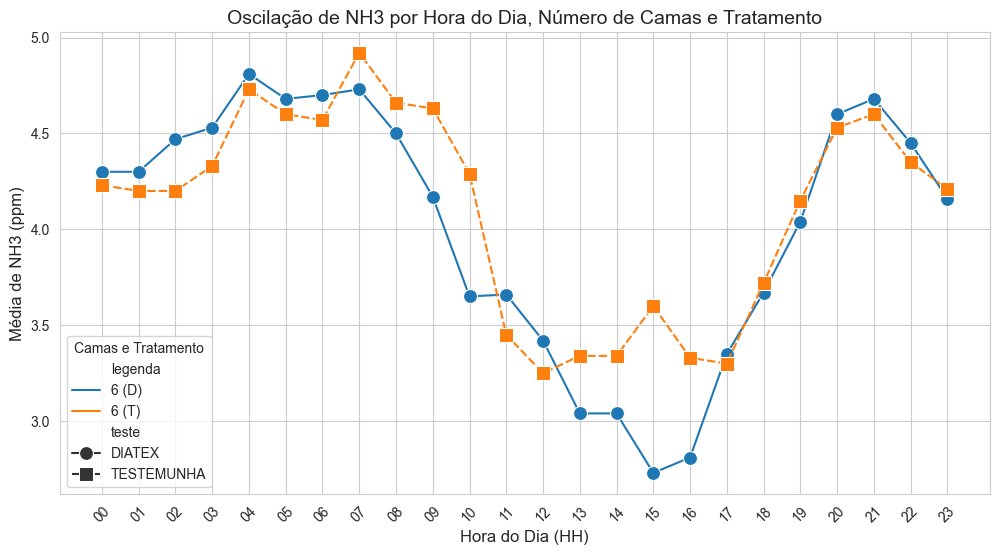

Gráfico salvo em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/nh3_oscilacao_por_hora_camas_tratamento.png
Tabela salva em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/nh3_por_hora_camas_tratamento.csv
Conexão com o banco fechada.


In [ ]:
# Célula 12: Gráfico de linha - Análise de NH3 por hora do dia, número de camas e tratamento
# Reabrir a conexão com o banco SQLite
conn = sqlite3.connect(r'C:\Users\user\Data Science\ADOX - Teste Diatex\database\TESTE_DIATEX.db')

# Query SQL para extrair hora (HH) e calcular média de NH3
query = """
SELECT 
    SUBSTR(m.Hora, 1, 2) AS hora_do_dia,
    m.Nome_Arquivo,
    t.teste,
    m.n_cama,
    ROUND(AVG(m.NH3), 2) AS media_nh3,
    COUNT(*) AS num_registros
FROM medicoes m
JOIN tratamentos t ON m.Nome_Arquivo = t.aviario
GROUP BY SUBSTR(m.Hora, 1, 2), m.Nome_Arquivo, t.teste, m.n_cama
ORDER BY hora_do_dia, m.Nome_Arquivo;
"""

# Executar query e carregar em DataFrame
df_hora_cama = pd.read_sql_query(query, conn)

# Criar coluna 'legenda' com n_cama e sufixos (D) para DIATEX e (T) para TESTEMUNHA
df_hora_cama['legenda'] = df_hora_cama.apply(lambda row: f"{row['n_cama']} (D)" if row['teste'] == 'DIATEX' else f"{row['n_cama']} (T)", axis=1)

# Exibir tabela resumida
print('Média de NH3 por hora do dia, número de camas e tratamento:')
display(df_hora_cama[['hora_do_dia', 'n_cama', 'teste', 'media_nh3', 'num_registros', 'legenda']])

# Criar gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hora_cama, x='hora_do_dia', y='media_nh3', hue='legenda', style='teste', markers={'DIATEX': 'o', 'TESTEMUNHA': 's'}, markersize=10)

# Configurar título e rótulos
plt.title('Oscilação de NH3 por Hora do Dia, Número de Camas e Tratamento', fontsize=14)
plt.xlabel('Hora do Dia (HH)', fontsize=12)
plt.ylabel('Média de NH3 (ppm)', fontsize=12)
plt.legend(title='Camas e Tratamento')
plt.xticks(rotation=45)

# Salvar gráfico
plt.savefig(os.path.join(output_dir, 'nh3_oscilacao_por_hora_camas_tratamento.png'))
plt.show()
print(f'Gráfico salvo em: {output_dir}/nh3_oscilacao_por_hora_camas_tratamento.png')

# Salvar tabela em CSV
df_hora_cama.to_csv(os.path.join(output_dir, 'nh3_por_hora_camas_tratamento.csv'), index=False, encoding='utf-8-sig')
print(f'Tabela salva em: {output_dir}/nh3_por_hora_camas_tratamento.csv')

# Fechar a conexão
conn.close()
print('Conexão com o banco fechada.')

Média de NH3 por idade do lote, número de camas e tratamento:


,idade_lote,n_cama,teste,media_nh3,num_registros,legenda
0,0,6,DIATEX,14.74,84,6 (D)
1,1,6,DIATEX,9.68,282,6 (D)
2,2,6,DIATEX,8.11,289,6 (D)
3,3,6,DIATEX,5.74,281,6 (D)
4,4,6,DIATEX,8.08,181,6 (D)
5,5,6,DIATEX,3.48,92,6 (D)
6,6,6,DIATEX,3.30,230,6 (D)
7,7,6,DIATEX,4.04,157,6 (D)
8,8,6,DIATEX,3.90,147,6 (D)
9,9,6,DIATEX,3.18,155,6 (D)


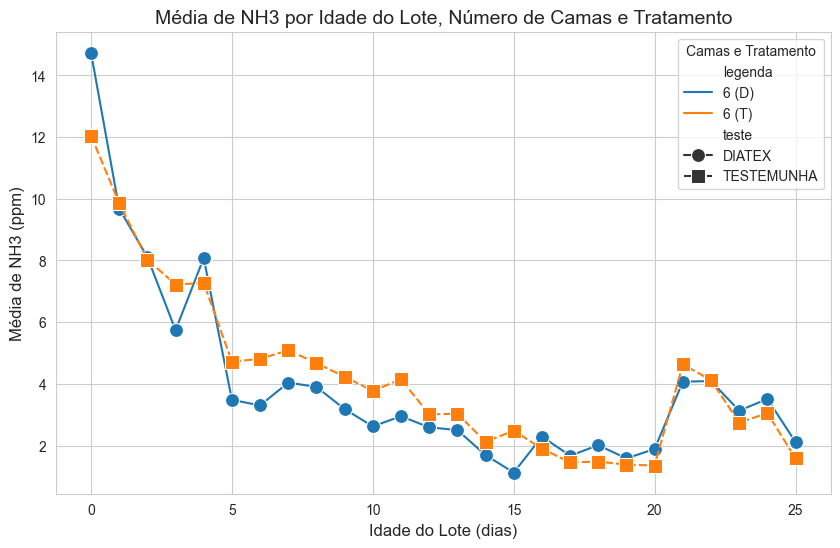

Gráfico salvo em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/nh3_por_idade_camas_tratamento.png
Tabela salva em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/nh3_por_idade_camas_tratamento.csv
Conexão com o banco fechada.


In [ ]:
# Célula 13: Gráfico de linha - Análise de NH3 por idade do lote, número de camas e tratamento
# Reabrir a conexão com o banco SQLite
conn = sqlite3.connect(r'C:\Users\user\Data Science\ADOX - Teste Diatex\database\TESTE_DIATEX.db')

# Query para calcular média de NH3 por idade_lote, aviário e n_cama
query = """
SELECT 
    m.Nome_Arquivo,
    t.teste,
    m.n_cama,
    m.idade_lote,
    ROUND(AVG(m.NH3), 2) AS media_nh3,
    COUNT(*) AS num_registros
FROM medicoes m
JOIN tratamentos t ON m.Nome_Arquivo = t.aviario
WHERE m.idade_lote >= 0  -- Excluir idade_lote inválida
GROUP BY m.Nome_Arquivo, t.teste, m.n_cama, m.idade_lote
ORDER BY t.teste, m.idade_lote;
"""

# Carregar em DataFrame
df_cama_idade = pd.read_sql_query(query, conn)

# Criar coluna 'legenda' com n_cama e sufixos (D) para DIATEX e (T) para TESTEMUNHA
df_cama_idade['legenda'] = df_cama_idade.apply(lambda row: f"{row['n_cama']} (D)" if row['teste'] == 'DIATEX' else f"{row['n_cama']} (T)", axis=1)

# Exibir tabela resumida
print('Média de NH3 por idade do lote, número de camas e tratamento:')
display(df_cama_idade[['idade_lote', 'n_cama', 'teste', 'media_nh3', 'num_registros', 'legenda']])

# Criar gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cama_idade, x='idade_lote', y='media_nh3', hue='legenda', style='teste', markers={'DIATEX': 'o', 'TESTEMUNHA': 's'}, markersize=10)

# Configurar título e rótulos
plt.title('Média de NH3 por Idade do Lote, Número de Camas e Tratamento', fontsize=14)
plt.xlabel('Idade do Lote (dias)', fontsize=12)
plt.ylabel('Média de NH3 (ppm)', fontsize=12)
plt.legend(title='Camas e Tratamento')

# Salvar gráfico
plt.savefig(os.path.join(output_dir, 'nh3_por_idade_camas_tratamento.png'))
plt.show()
print(f'Gráfico salvo em: {output_dir}/nh3_por_idade_camas_tratamento.png')

# Salvar tabela em CSV
df_cama_idade.to_csv(os.path.join(output_dir, 'nh3_por_idade_camas_tratamento.csv'), index=False, encoding='utf-8-sig')
print(f'Tabela salva em: {output_dir}/nh3_por_idade_camas_tratamento.csv')

# Fechar a conexão
conn.close()
print('Conexão com o banco fechada.')

Média de Umidade por hora do dia, número de camas e tratamento:


,hora_do_dia,n_cama,teste,media_humedad,num_registros,legenda
0,00,6,DIATEX,66.69,214,6 (D)
1,00,6,TESTEMUNHA,61.04,446,6 (T)
2,01,6,DIATEX,66.86,203,6 (D)
3,01,6,TESTEMUNHA,61.22,452,6 (T)
4,02,6,DIATEX,66.89,203,6 (D)
5,02,6,TESTEMUNHA,61.65,444,6 (T)
6,03,6,DIATEX,66.47,205,6 (D)
7,03,6,TESTEMUNHA,61.79,427,6 (T)
8,04,6,DIATEX,67.56,199,6 (D)
9,04,6,TESTEMUNHA,61.88,437,6 (T)


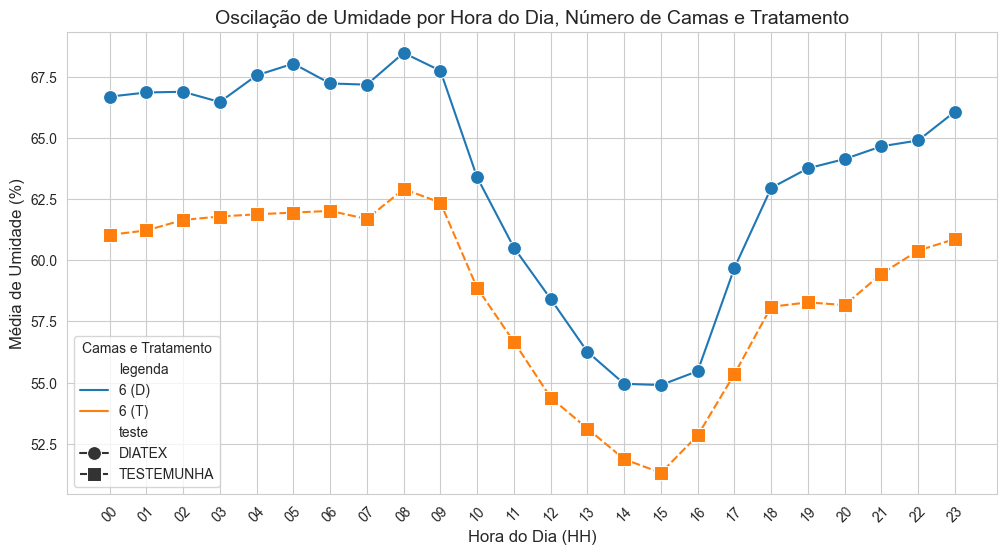

Gráfico salvo em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/humedad_oscilacao_por_hora.png
Tabela salva em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/humedad_por_hora.csv
Conexão com o banco fechada.


In [ ]:
# Célula 14: Gráfico de linha - Análise de Umidade por hora do dia, número de camas e tratamento
# Reabrir a conexão com o banco SQLite
conn = sqlite3.connect(r'C:\Users\user\Data Science\ADOX - Teste Diatex\database\TESTE_DIATEX.db')

# Query SQL para extrair hora (HH) e calcular média de Humedad
query = """
SELECT 
    SUBSTR(m.Hora, 1, 2) AS hora_do_dia,
    m.Nome_Arquivo,
    t.teste,
    m.n_cama,
    ROUND(AVG(m.Humedad), 2) AS media_humedad,
    COUNT(*) AS num_registros
FROM medicoes m
JOIN tratamentos t ON m.Nome_Arquivo = t.aviario
WHERE m.idade_lote >= 0  -- Incluir todo o lote
GROUP BY SUBSTR(m.Hora, 1, 2), m.Nome_Arquivo, t.teste, m.n_cama
ORDER BY hora_do_dia, m.Nome_Arquivo;
"""

# Executar query e carregar em DataFrame
df_humedad = pd.read_sql_query(query, conn)

# Criar coluna 'legenda' com n_cama e sufixos (D) para DIATEX e (T) para TESTEMUNHA
df_humedad['legenda'] = df_humedad.apply(lambda row: f"{row['n_cama']} (D)" if row['teste'] == 'DIATEX' else f"{row['n_cama']} (T)", axis=1)

# Exibir tabela resumida
print('Média de Umidade por hora do dia, número de camas e tratamento:')
display(df_humedad[['hora_do_dia', 'n_cama', 'teste', 'media_humedad', 'num_registros', 'legenda']])

# Criar gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_humedad, x='hora_do_dia', y='media_humedad', hue='legenda', style='teste', markers={'DIATEX': 'o', 'TESTEMUNHA': 's'}, markersize=10)

# Configurar título e rótulos
plt.title('Oscilação de Umidade por Hora do Dia, Número de Camas e Tratamento', fontsize=14)
plt.xlabel('Hora do Dia (HH)', fontsize=12)
plt.ylabel('Média de Umidade (%)', fontsize=12)
plt.legend(title='Camas e Tratamento')
plt.xticks(rotation=45)

# Salvar gráfico
plt.savefig(os.path.join(output_dir, 'humedad_oscilacao_por_hora.png'))
plt.show()
print(f'Gráfico salvo em: {output_dir}/humedad_oscilacao_por_hora.png')

# Salvar tabela em CSV
df_humedad.to_csv(os.path.join(output_dir, 'humedad_por_hora.csv'), index=False, encoding='utf-8-sig')
print(f'Tabela salva em: {output_dir}/humedad_por_hora.csv')

# Fechar a conexão
conn.close()
print('Conexão com o banco fechada.')

Média de Temperatura por hora do dia, número de camas e tratamento:


,hora_do_dia,n_cama,teste,media_temperatura,num_registros,legenda
0,00,6,DIATEX,25.90,214,6 (D)
1,00,6,TESTEMUNHA,25.37,446,6 (T)
2,01,6,DIATEX,25.45,203,6 (D)
3,01,6,TESTEMUNHA,25.16,452,6 (T)
4,02,6,DIATEX,25.67,203,6 (D)
5,02,6,TESTEMUNHA,24.89,444,6 (T)
6,03,6,DIATEX,25.25,205,6 (D)
7,03,6,TESTEMUNHA,24.98,427,6 (T)
8,04,6,DIATEX,24.93,199,6 (D)
9,04,6,TESTEMUNHA,24.86,437,6 (T)


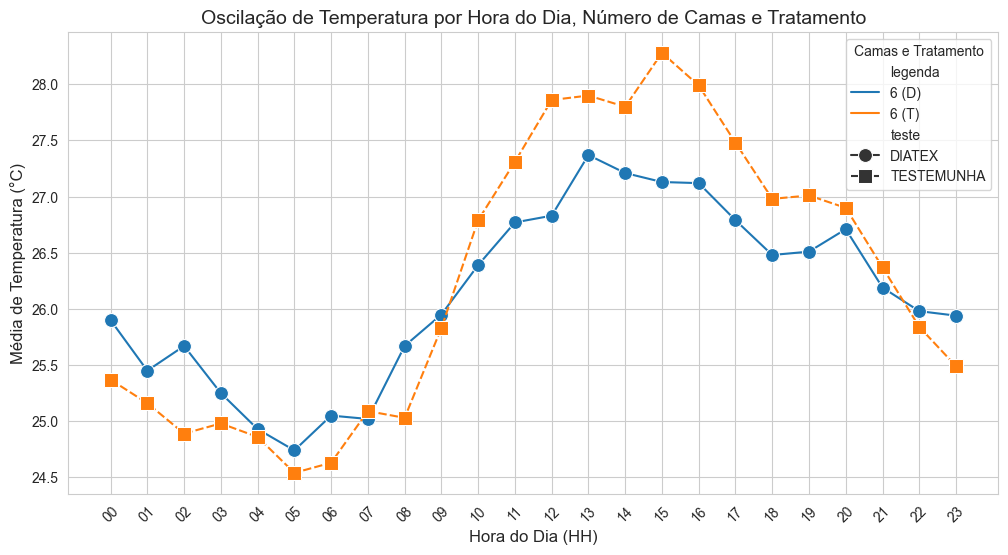

Gráfico salvo em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/temperatura_oscilacao_por_hora.png
Tabela salva em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/temperatura_por_hora.csv
Conexão com o banco fechada.


In [ ]:
# Célula 15: Gráfico de linha - Análise de Temperatura por hora do dia, número de camas e tratamento
# Reabrir a conexão com o banco SQLite
conn = sqlite3.connect(r'C:\Users\user\Data Science\ADOX - Teste Diatex\database\TESTE_DIATEX.db')

# Query SQL para extrair hora (HH) e calcular média de Temperatura
query = """
SELECT 
    SUBSTR(m.Hora, 1, 2) AS hora_do_dia,
    m.Nome_Arquivo,
    t.teste,
    m.n_cama,
    ROUND(AVG(m.Temperatura), 2) AS media_temperatura,
    COUNT(*) AS num_registros
FROM medicoes m
JOIN tratamentos t ON m.Nome_Arquivo = t.aviario
WHERE m.idade_lote >= 0  -- Incluir todo o lote
GROUP BY SUBSTR(m.Hora, 1, 2), m.Nome_Arquivo, t.teste, m.n_cama
ORDER BY hora_do_dia, m.Nome_Arquivo;
"""

# Executar query e carregar em DataFrame
df_temperatura = pd.read_sql_query(query, conn)

# Criar coluna 'legenda' com n_cama e sufixos (D) para DIATEX e (T) para TESTEMUNHA
df_temperatura['legenda'] = df_temperatura.apply(lambda row: f"{row['n_cama']} (D)" if row['teste'] == 'DIATEX' else f"{row['n_cama']} (T)", axis=1)

# Exibir tabela resumida
print('Média de Temperatura por hora do dia, número de camas e tratamento:')
display(df_temperatura[['hora_do_dia', 'n_cama', 'teste', 'media_temperatura', 'num_registros', 'legenda']])

# Criar gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_temperatura, x='hora_do_dia', y='media_temperatura', hue='legenda', style='teste', markers={'DIATEX': 'o', 'TESTEMUNHA': 's'}, markersize=10)

# Configurar título e rótulos
plt.title('Oscilação de Temperatura por Hora do Dia, Número de Camas e Tratamento', fontsize=14)
plt.xlabel('Hora do Dia (HH)', fontsize=12)
plt.ylabel('Média de Temperatura (°C)', fontsize=12)
plt.legend(title='Camas e Tratamento')
plt.xticks(rotation=45)

# Salvar gráfico
plt.savefig(os.path.join(output_dir, 'temperatura_oscilacao_por_hora.png'))
plt.show()
print(f'Gráfico salvo em: {output_dir}/temperatura_oscilacao_por_hora.png')

# Salvar tabela em CSV
df_temperatura.to_csv(os.path.join(output_dir, 'temperatura_por_hora.csv'), index=False, encoding='utf-8-sig')
print(f'Tabela salva em: {output_dir}/temperatura_por_hora.csv')

# Fechar a conexão
conn.close()
print('Conexão com o banco fechada.')

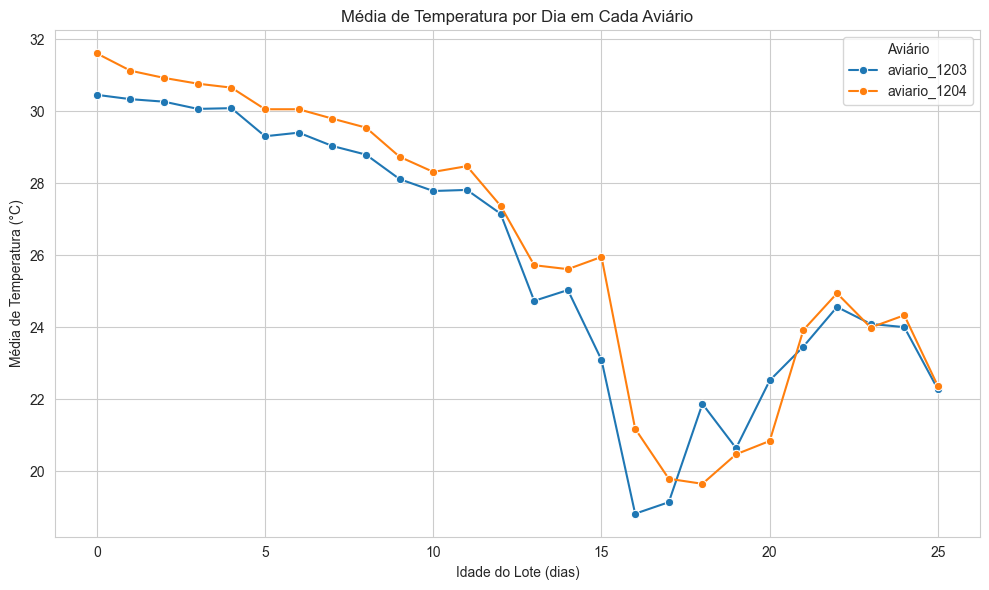

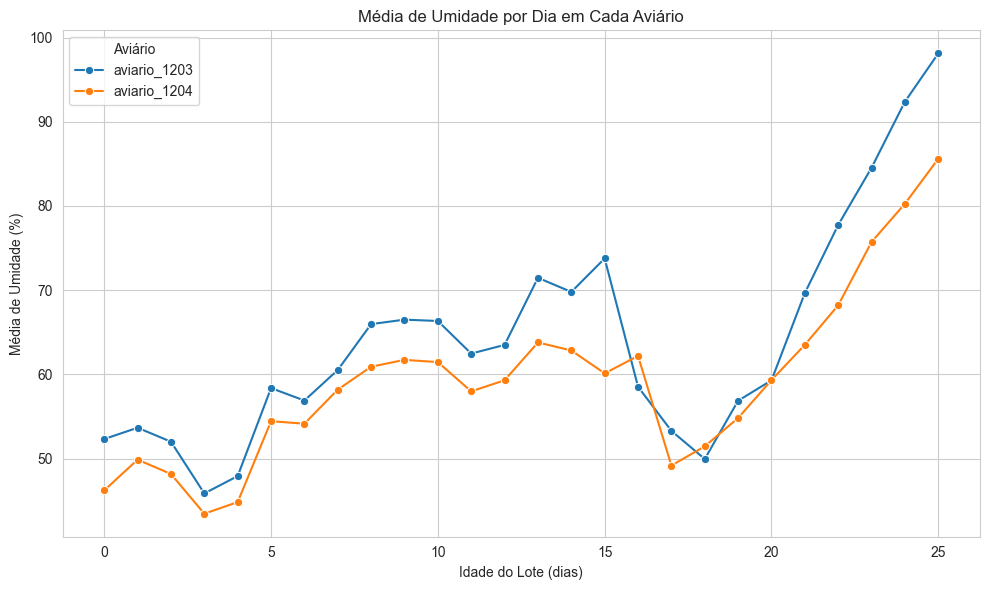

Conexão com o banco fechada.


In [ ]:
# Consulta SQL para média de temperatura por dia (idade_lote) em cada aviário
# Reabrir a conexão com o banco SQLite
conn = sqlite3.connect(r'C:\Users\user\Data Science\ADOX - Teste Diatex\database\TESTE_DIATEX.db')

query_temp_dia = """
SELECT 
    m.Nome_Arquivo,
    m.idade_lote,
    ROUND(AVG(m.Temperatura), 2) AS media_temperatura
FROM medicoes m
WHERE m.idade_lote >= 0 AND m.Temperatura IS NOT NULL
GROUP BY m.Nome_Arquivo, m.idade_lote
ORDER BY m.Nome_Arquivo, m.idade_lote
"""

df_temp_dia = pd.read_sql_query(query_temp_dia, conn)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_temp_dia, x='idade_lote', y='media_temperatura', hue='Nome_Arquivo', marker='o')
plt.title('Média de Temperatura por Dia em Cada Aviário')
plt.xlabel('Idade do Lote (dias)')
plt.ylabel('Média de Temperatura (°C)')
plt.legend(title='Aviário')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'media_temperatura_por_dia_aviario.png'))
plt.show()



# Consulta SQL para média de umidade por dia (idade_lote) em cada aviário
query_umidade_dia = """
SELECT 
    m.Nome_Arquivo,
    m.idade_lote,
    ROUND(AVG(m.Humedad), 2) AS media_umidade
FROM medicoes m
WHERE m.idade_lote >= 0 AND m.Humedad IS NOT NULL
GROUP BY m.Nome_Arquivo, m.idade_lote
ORDER BY m.Nome_Arquivo, m.idade_lote
"""

df_umidade_dia = pd.read_sql_query(query_umidade_dia, conn)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_umidade_dia, x='idade_lote', y='media_umidade', hue='Nome_Arquivo', marker='o')
plt.title('Média de Umidade por Dia em Cada Aviário')
plt.xlabel('Idade do Lote (dias)')
plt.ylabel('Média de Umidade (%)')
plt.legend(title='Aviário')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'media_umidade_por_dia_aviario.png'))
plt.show()

# Fechar a conexão
conn.close()
print('Conexão com o banco fechada.')

Correlação para DIATEX (6 (D)):


,NH3,Humedad,Temperatura
NH3,1.000000,-0.327394,0.546354
Humedad,-0.327394,1.000000,-0.442219
Temperatura,0.546354,-0.442219,1.000000


Correlação para TESTEMUNHA (6 (T)):


,NH3,Humedad,Temperatura
NH3,1.000000,-0.342539,0.631260
Humedad,-0.342539,1.000000,-0.413667
Temperatura,0.631260,-0.413667,1.000000


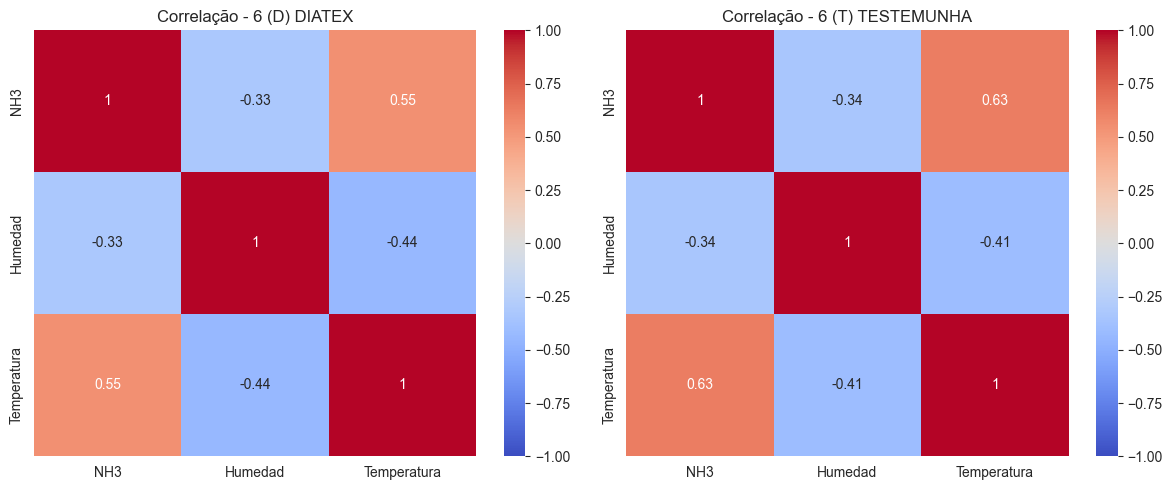

Heatmap salvo em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/correlacao_nh3_humedad_temperatura.png


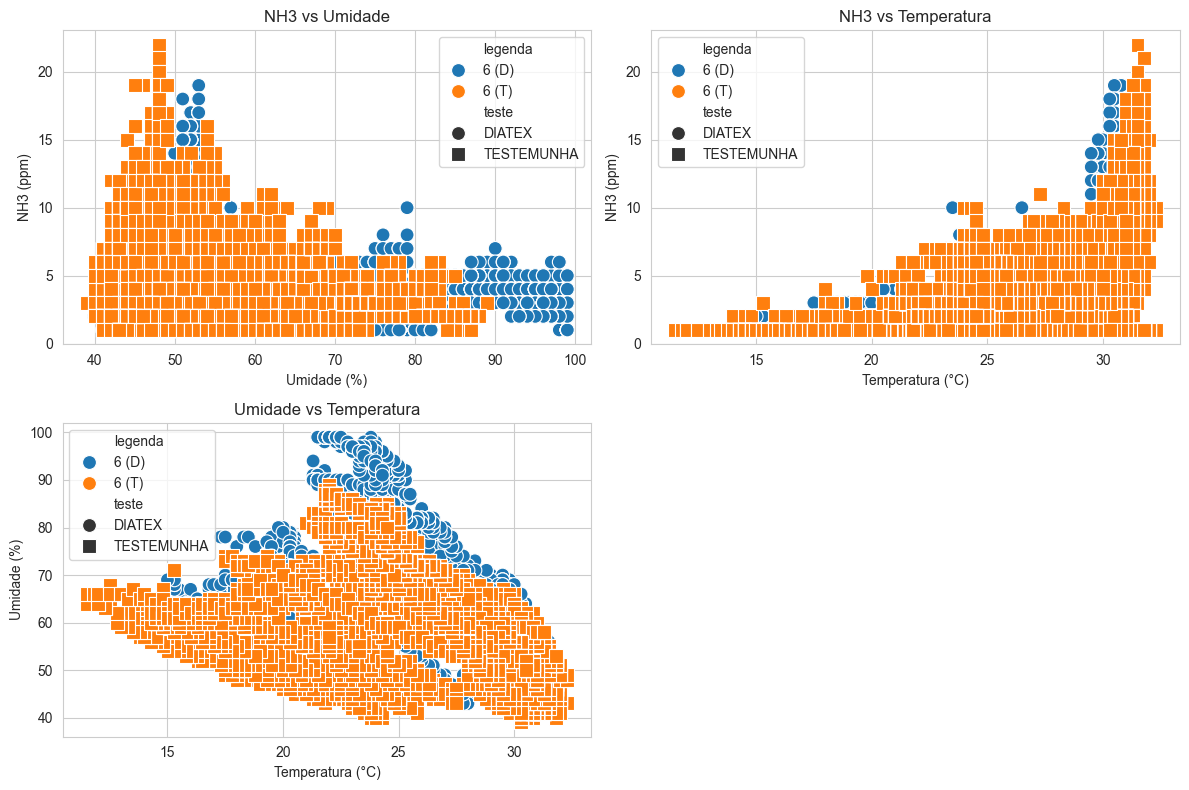

Gráficos de dispersão salvos em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/dispersao_nh3_humedad_temperatura.png
Dados salvos em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/correlacao_dados.csv
Conexão com o banco fechada.


In [ ]:
# Célula 16: Análise de correlação entre NH3, Umidade e Temperatura
# Reabrir a conexão com o banco SQLite
conn = sqlite3.connect(r'C:\Users\user\Data Science\ADOX - Teste Diatex\database\TESTE_DIATEX.db')

# Query SQL para extrair NH3, Humedad e Temperatura
query = """
SELECT 
    m.Nome_Arquivo,
    t.teste,
    m.n_cama,
    m.NH3,
    m.Humedad,
    m.Temperatura
FROM medicoes m
JOIN tratamentos t ON m.Nome_Arquivo = t.aviario
WHERE m.idade_lote >= 0  -- Incluir todo o lote
AND m.NH3 IS NOT NULL
AND m.Humedad IS NOT NULL
AND m.Temperatura IS NOT NULL;
"""

# Carregar em DataFrame
df_correlacao = pd.read_sql_query(query, conn)

# Criar coluna 'legenda' com n_cama e sufixos (D) para DIATEX e (T) para TESTEMUNHA
df_correlacao['legenda'] = df_correlacao.apply(lambda row: f"{row['n_cama']} (D)" if row['teste'] == 'DIATEX' else f"{row['n_cama']} (T)", axis=1)

# Calcular correlação por tratamento
correlacao_diatex = df_correlacao[df_correlacao['teste'] == 'DIATEX'][['NH3', 'Humedad', 'Temperatura']].corr()
correlacao_testemunha = df_correlacao[df_correlacao['teste'] == 'TESTEMUNHA'][['NH3', 'Humedad', 'Temperatura']].corr()

# Exibir matrizes de correlação
print('Correlação para DIATEX (6 (D)):')
display(correlacao_diatex)
print('Correlação para TESTEMUNHA (6 (T)):')
display(correlacao_testemunha)

# Criar heatmap para cada tratamento
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(correlacao_diatex, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlação - 6 (D) DIATEX')

plt.subplot(1, 2, 2)
sns.heatmap(correlacao_testemunha, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlação - 6 (T) TESTEMUNHA')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'correlacao_nh3_humedad_temperatura.png'))
plt.show()
print(f'Heatmap salvo em: {output_dir}/correlacao_nh3_humedad_temperatura.png')

# Gráficos de dispersão
plt.figure(figsize=(12, 8))

# NH3 vs Humedad
plt.subplot(2, 2, 1)
sns.scatterplot(data=df_correlacao, x='Humedad', y='NH3', hue='legenda', style='teste', markers={'DIATEX': 'o', 'TESTEMUNHA': 's'}, s=100)
plt.title('NH3 vs Umidade')
plt.xlabel('Umidade (%)')
plt.ylabel('NH3 (ppm)')

# NH3 vs Temperatura
plt.subplot(2, 2, 2)
sns.scatterplot(data=df_correlacao, x='Temperatura', y='NH3', hue='legenda', style='teste', markers={'DIATEX': 'o', 'TESTEMUNHA': 's'}, s=100)
plt.title('NH3 vs Temperatura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('NH3 (ppm)')

# Humedad vs Temperatura
plt.subplot(2, 2, 3)
sns.scatterplot(data=df_correlacao, x='Temperatura', y='Humedad', hue='legenda', style='teste', markers={'DIATEX': 'o', 'TESTEMUNHA': 's'}, s=100)
plt.title('Umidade vs Temperatura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Umidade (%)')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'dispersao_nh3_humedad_temperatura.png'))
plt.show()
print(f'Gráficos de dispersão salvos em: {output_dir}/dispersao_nh3_humedad_temperatura.png')

# Salvar dados em CSV
df_correlacao.to_csv(os.path.join(output_dir, 'correlacao_dados.csv'), index=False, encoding='utf-8-sig')
print(f'Dados salvos em: {output_dir}/correlacao_dados.csv')

# Fechar a conexão
conn.close()
print('Conexão com o banco fechada.')

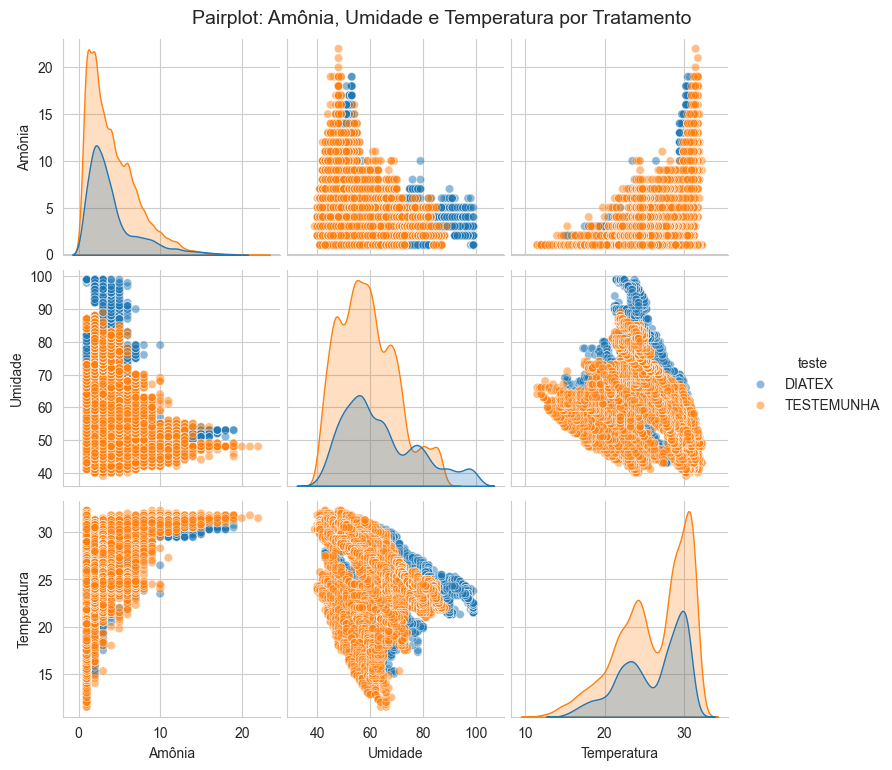

In [ ]:
# Pairplot dos parâmetros Temperatura, Umidade e Amônia (NH3) usando dados da tabela medicoes

# Reabrir conexão sempre, pois pode estar fechada
conn = sqlite3.connect(db_path)

# Consulta SQL para extrair NH3, Humedad e Temperatura
query_pairplot = """
SELECT 
    m.NH3,
    m.Humedad,
    m.Temperatura,
    t.teste
FROM medicoes m
JOIN tratamentos t ON m.Nome_Arquivo = t.aviario
WHERE m.idade_lote >= 0
  AND m.NH3 IS NOT NULL
  AND m.Humedad IS NOT NULL
  AND m.Temperatura IS NOT NULL
"""
df_pairplot = pd.read_sql_query(query_pairplot, conn)

# Renomear colunas para português
df_pairplot.rename(columns={'NH3': 'Amônia', 'Humedad': 'Umidade', 'Temperatura': 'Temperatura'}, inplace=True)

# Criar pairplot
sns.pairplot(df_pairplot, vars=['Amônia', 'Umidade', 'Temperatura'], hue='teste', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot: Amônia, Umidade e Temperatura por Tratamento', y=1.02, fontsize=14)
plt.show()

Teste de Normalidade (Shapiro-Wilk):
DIATEX: ShapiroResult(statistic=np.float64(0.8062502424337339), pvalue=np.float64(5.382202277584254e-60))
TESTEMUNHA: ShapiroResult(statistic=np.float64(0.870972180478147), pvalue=np.float64(5.426776483264605e-68))

Teste de Homocedasticidade (Levene):
LeveneResult(statistic=np.float64(20.507067114764922), pvalue=np.float64(5.986799566736086e-06))

Teste t de Student: t = -1.162, p = 0.245
Resultado: Não se rejeita a hipótese nula (médias semelhantes, p >= 0.05)

Resumo Estatístico:


c:\Users\user\scoop\apps\python310\3.10.11\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10279.
  res = hypotest_fun_out(*samples, **kwds)


,mean,std,count
legenda,,,
6 (D),4.07,3.18,4761
6 (T),4.14,3.05,10279


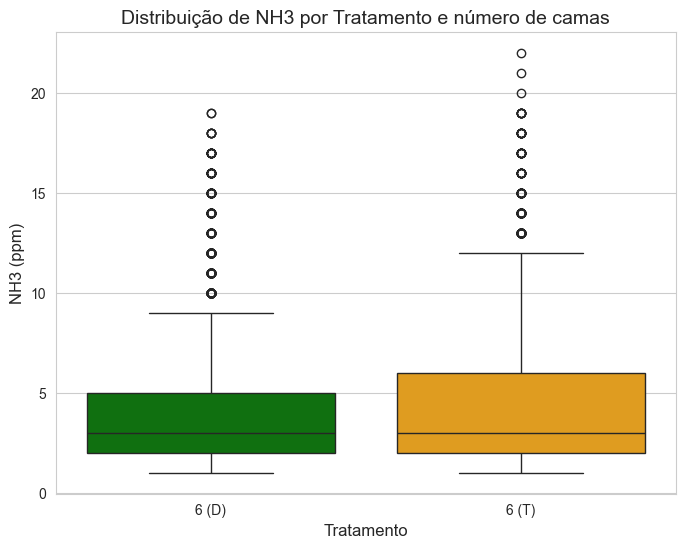

Boxplot salvo em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/boxplot_nh3_tratamento.png
Resumo salvo em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/resumo_nh3_tratamento.csv


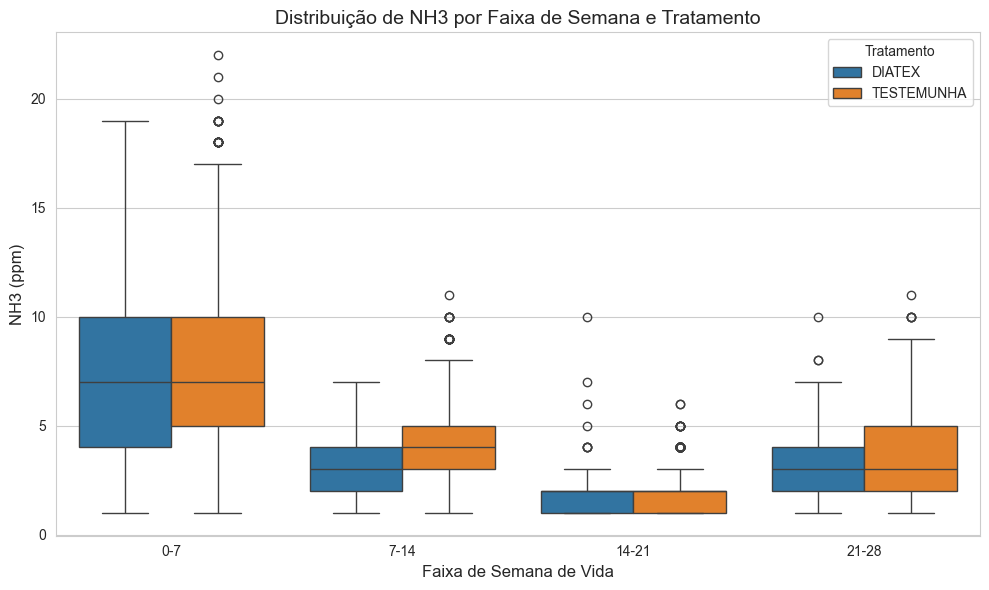

Boxplot salvo em: C:\Users\user\Data Science\ADOX - Teste Diatex\output\boxplot_nh3_por_faixa_semana.png
Conexão com o banco fechada.


In [ ]:
# Célula 17: Teste t de Student para comparar médias de NH3 entre DIATEX e TESTEMUNHA
import pandas as pd
import sqlite3
from scipy.stats import ttest_ind, shapiro, levene
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Reabrir a conexão com o banco SQLite
conn = sqlite3.connect(r'C:\Users\user\Data Science\ADOX - Teste Diatex\database\TESTE_DIATEX.db')

# Carregar dados
query = """
SELECT m.NH3, t.teste, m.n_cama
FROM medicoes m
JOIN tratamentos t ON m.Nome_Arquivo = t.aviario
WHERE m.idade_lote >= 0 AND m.NH3 IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)

# Criar legenda
df['legenda'] = df.apply(lambda row: f"{row['n_cama']} (D)" if row['teste'] == 'DIATEX' else f"{row['n_cama']} (T)", axis=1)

# Separar grupos
nh3_diatex = df[df['teste'] == 'DIATEX']['NH3']
nh3_testemunha = df[df['teste'] == 'TESTEMUNHA']['NH3']

# Verificar pressupostos
print("Teste de Normalidade (Shapiro-Wilk):")
print("DIATEX:", shapiro(nh3_diatex))
print("TESTEMUNHA:", shapiro(nh3_testemunha))
print("\nTeste de Homocedasticidade (Levene):")
print(levene(nh3_diatex, nh3_testemunha))

# Teste t de Student
t_stat, p_value = ttest_ind(nh3_diatex, nh3_testemunha, equal_var=True)  # Ajustar equal_var se Levene indicar heterocedasticidade
print(f"\nTeste t de Student: t = {t_stat:.3f}, p = {p_value:.3f}")

# Avaliação do resultado do teste t
if p_value < 0.05:
    print("Resultado: Rejeita-se a hipótese nula (médias significativamente diferentes, p < 0.05)")
else:
    print("Resultado: Não se rejeita a hipótese nula (médias semelhantes, p >= 0.05)")

# Resumo estatístico
resumo = df.groupby('legenda')['NH3'].agg(['mean', 'std', 'count']).round(2)
print("\nResumo Estatístico:")
display(resumo)

# Boxplot (corrigido para evitar FutureWarning)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='legenda', y='NH3', hue='legenda', palette={'6 (D)': 'green', '6 (T)': 'orange'}, legend=False)
plt.title('Distribuição de NH3 por Tratamento e número de camas', fontsize=14)
plt.xlabel('Tratamento', fontsize=12)
plt.ylabel('NH3 (ppm)', fontsize=12)

# Salvar gráfico
plt.savefig(os.path.join(output_dir, 'boxplot_nh3_tratamento.png'))
plt.show()
print(f"Boxplot salvo em: {output_dir}/boxplot_nh3_tratamento.png")

# Salvar resumo em CSV
resumo.to_csv(os.path.join(output_dir, 'resumo_nh3_tratamento.csv'), encoding='utf-8-sig')
print(f"Resumo salvo em: {output_dir}/resumo_nh3_tratamento.csv")

# Boxplot de NH3 por faixa de semana de vida (idade_lote agrupada em faixas semanais)
# Adicionar coluna de faixa semanal usando df_correlacao, que possui idade_lote
def faixa_semana(idade):
    inicio = (idade // 7) * 7
    fim = inicio + 7
    return f"{inicio}-{fim}"

# Consultar idade_lote diretamente da tabela medicoes para garantir a coluna
query_idade_lote = """
SELECT 
    m.NH3,
    m.idade_lote,
    t.teste
FROM medicoes m
JOIN tratamentos t ON m.Nome_Arquivo = t.aviario
WHERE m.idade_lote >= 0 AND m.NH3 IS NOT NULL AND m.idade_lote IS NOT NULL
"""
df_idade_lote = pd.read_sql_query(query_idade_lote, conn)

# Adicionar coluna de faixa semanal
df_idade_lote['faixa_semana'] = df_idade_lote['idade_lote'].apply(faixa_semana)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_idade_lote, x='faixa_semana', y='NH3', hue='teste')
plt.title('Distribuição de NH3 por Faixa de Semana e Tratamento', fontsize=14)
plt.xlabel('Faixa de Semana de Vida', fontsize=12)
plt.ylabel('NH3 (ppm)', fontsize=12)
plt.legend(title='Tratamento')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'boxplot_nh3_por_faixa_semana.png'))
plt.show()
print(f"Boxplot salvo em: {os.path.join(output_dir, 'boxplot_nh3_por_faixa_semana.png')}")

# Fechar a conexão
conn.close()
print('Conexão com o banco fechada.')

Teste de Mann-Whitney U: U = 24048669.000, p = 0.086

Resumo Estatístico (Mediana):


,median,count
legenda,,
6 (D),3.0,4761
6 (T),3.0,10279


Resultado: Não se rejeita a hipótese nula (distribuições semelhantes, p >= 0.05)


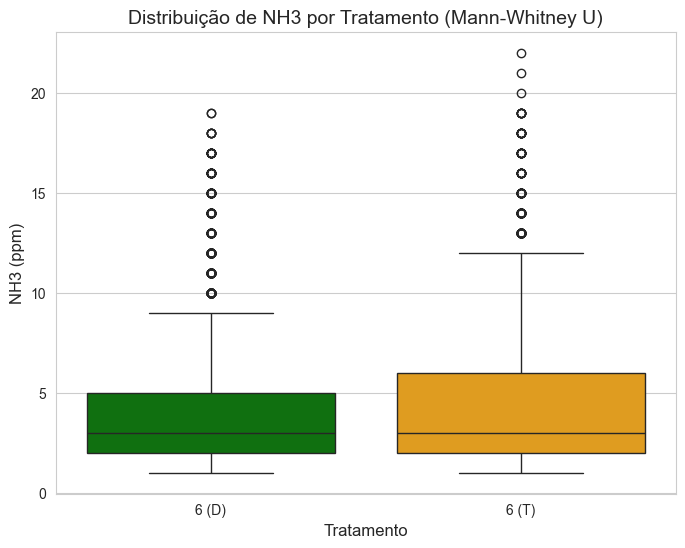

Boxplot salvo em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/boxplot_nh3_mannwhitney.png
Resumo salvo em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/resumo_nh3_mannwhitney.csv
Conexão com o banco fechada.


In [ ]:
# Célula 18: Teste de Mann-Whitney U para comparar NH3 entre DIATEX e TESTEMUNHA
import pandas as pd
import sqlite3
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

# Reabrir a conexão com o banco SQLite
conn = sqlite3.connect(r'C:\Users\user\Data Science\ADOX - Teste Diatex\database\TESTE_DIATEX.db')

# Carregar dados
query = """
SELECT m.NH3, t.teste, m.n_cama, m.idade_lote
FROM medicoes m
JOIN tratamentos t ON m.Nome_Arquivo = t.aviario
WHERE m.idade_lote >= 0 AND m.NH3 IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)

# Criar legenda
df['legenda'] = df.apply(lambda row: f"{row['n_cama']} (D)" if row['teste'] == 'DIATEX' else f"{row['n_cama']} (T)", axis=1)

# Separar grupos
nh3_diatex = df[df['teste'] == 'DIATEX']['NH3']
nh3_testemunha = df[df['teste'] == 'TESTEMUNHA']['NH3']

# Teste de Mann-Whitney U
stat, p_value = mannwhitneyu(nh3_diatex, nh3_testemunha, alternative='two-sided')
print(f"Teste de Mann-Whitney U: U = {stat:.3f}, p = {p_value:.3f}")

# Resumo estatístico (mediana para não paramétrico)
resumo = df.groupby('legenda')['NH3'].agg(['median', 'count']).round(2)
print("\nResumo Estatístico (Mediana):")
display(resumo)

# Avaliação da hipótese nula
if p_value < 0.05:
    print("Resultado: Rejeita-se a hipótese nula (distribuições diferentes, p < 0.05)")
else:
    print("Resultado: Não se rejeita a hipótese nula (distribuições semelhantes, p >= 0.05)")

# Boxplot (corrigido para evitar FutureWarning)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='legenda', y='NH3', hue='legenda', palette={'6 (D)': 'green', '6 (T)': 'orange'}, legend=False)
plt.title('Distribuição de NH3 por Tratamento (Mann-Whitney U)', fontsize=14)
plt.xlabel('Tratamento', fontsize=12)
plt.ylabel('NH3 (ppm)', fontsize=12)

# Salvar gráfico
plt.savefig(os.path.join(output_dir, 'boxplot_nh3_mannwhitney.png'))
plt.show()
print(f"Boxplot salvo em: {output_dir}/boxplot_nh3_mannwhitney.png")

# Salvar resumo em CSV
resumo.to_csv(os.path.join(output_dir, 'resumo_nh3_mannwhitney.csv'), encoding='utf-8-sig')
print(f"Resumo salvo em: {output_dir}/resumo_nh3_mannwhitney.csv")


# Fechar a conexão
conn.close()
print('Conexão com o banco fechada.')

Resultados do teste de Mann-Whitney U por semana de vida:


,faixa_semana,n_diatex,n_testemunha,mediana_diatex,mediana_testemunha,U,p_value
0,0-7,1439,2538,7.0,7.0,1672583.5,9.415018e-06
1,14-21,1229,3096,2.0,2.0,1960393.0,8.772614e-02
2,21-28,943,1954,3.0,3.0,968567.5,2.288971e-02
3,7-14,1150,2691,3.0,4.0,1019159.0,3.424023e-65


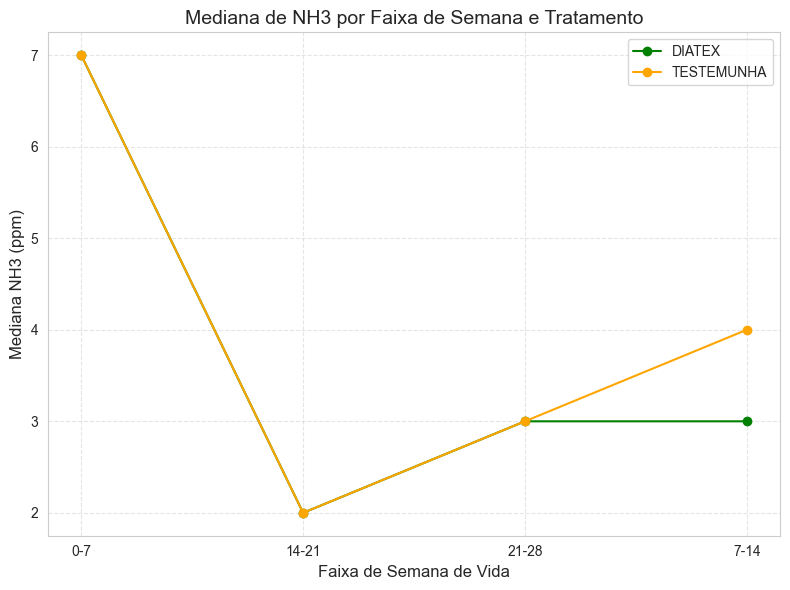

Gráfico salvo em: C:\Users\user\Data Science\ADOX - Teste Diatex\output\mediana_nh3_por_faixa_semana.png


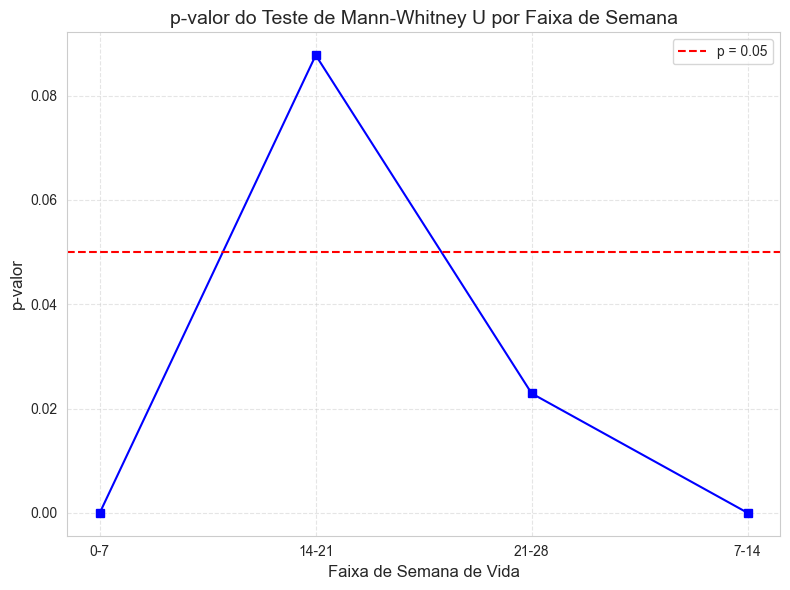

Gráfico de p-valor salvo em: C:\Users\user\Data Science\ADOX - Teste Diatex\output\pvalor_mannwhitney_por_semana.png
Resultados salvos em: C:\Users\user\Data Science\ADOX - Teste Diatex\output/mannwhitney_nh3_por_semana.csv


NameError: name 'df_semana' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:


# Teste de Mann-Whitney U por semana de vida (faixas de idade)

conn = sqlite3.connect(r'C:\Users\user\Data Science\ADOX - Teste Diatex\database\TESTE_DIATEX.db')

# Consulta SQL para obter NH3, idade_lote e teste da tabela medicoes para análise por faixas de idade
query_semana = """
SELECT 
    m.NH3,
    m.idade_lote,
    t.teste
FROM medicoes m
JOIN tratamentos t ON m.Nome_Arquivo = t.aviario
WHERE m.idade_lote >= 0 AND m.NH3 IS NOT NULL AND m.idade_lote IS NOT NULL
"""
df = pd.read_sql_query(query_semana, conn)

# Definir função para categorizar semanas no formato (0-7, 8-14, ...)
def faixa_semana(idade):
    inicio = (idade // 7) * 7
    fim = inicio + 7
    return f"{inicio}-{fim}"

# Adicionar coluna faixa_semana usando idade_lote
if 'idade_lote' in df.columns:
    df['faixa_semana'] = df['idade_lote'].apply(faixa_semana)
else:
    raise ValueError("Coluna idade_lote não encontrada para agrupar por semana.")

resultados = []
for faixa, grupo in df.groupby('faixa_semana'):
    nh3_d = grupo[grupo['teste'] == 'DIATEX']['NH3']
    nh3_t = grupo[grupo['teste'] == 'TESTEMUNHA']['NH3']
    if len(nh3_d) > 0 and len(nh3_t) > 0:
        stat, p = mannwhitneyu(nh3_d, nh3_t, alternative='two-sided')
        resultados.append({
            'faixa_semana': faixa,
            'n_diatex': len(nh3_d),
            'n_testemunha': len(nh3_t),
            'mediana_diatex': np.median(nh3_d),
            'mediana_testemunha': np.median(nh3_t),
            'U': stat,
            'p_value': p
        })

resultados_df = pd.DataFrame(resultados)
print("Resultados do teste de Mann-Whitney U por semana de vida:")
display(resultados_df)

# Plotando as medianas de NH3 por faixa de semana para cada tratamento
plt.figure(figsize=(8, 6))
for tratamento, cor in zip(['DIATEX', 'TESTEMUNHA'], ['green', 'orange']):
    plt.plot(
        resultados_df['faixa_semana'],
        resultados_df[f'mediana_{tratamento.lower()}'],
        marker='o',
        label=tratamento,
        color=cor
    )
plt.title('Mediana de NH3 por Faixa de Semana e Tratamento', fontsize=14)
plt.xlabel('Faixa de Semana de Vida', fontsize=12)
plt.ylabel('Mediana NH3 (ppm)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'mediana_nh3_por_faixa_semana.png'))
plt.show()
print(f"Gráfico salvo em: {os.path.join(output_dir, 'mediana_nh3_por_faixa_semana.png')}")

# Plotando o p-valor do teste de Mann-Whitney U por faixa de semana
plt.figure(figsize=(8, 6))
plt.plot(resultados_df['faixa_semana'], resultados_df['p_value'], marker='s', color='blue')
plt.axhline(0.05, color='red', linestyle='--', label='p = 0.05')
plt.title('p-valor do Teste de Mann-Whitney U por Faixa de Semana', fontsize=14)
plt.xlabel('Faixa de Semana de Vida', fontsize=12)
plt.ylabel('p-valor', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
# Salvar o gráfico na subpasta output
plt.savefig(os.path.join(output_dir, 'pvalor_mannwhitney_por_semana.png'))
plt.show()
print(f"Gráfico de p-valor salvo em: {os.path.join(output_dir, 'pvalor_mannwhitney_por_semana.png')}")

# Salvar resultados em CSV
resultados_df.to_csv(os.path.join(output_dir, 'mannwhitney_nh3_por_semana.csv'), index=False, encoding='utf-8-sig')
print(f"Resultados salvos em: {output_dir}/mannwhitney_nh3_por_semana.csv")

# Usar df_semana já existente para o boxplot semanal
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_semana, x='faixa_semana', y='NH3', hue='teste')
plt.title('Distribuição de NH3 por Período Semanal e Tratamento', fontsize=14)
plt.xlabel('Faixa de Semana de Vida', fontsize=12)
plt.ylabel('NH3 (ppm)', fontsize=12)
plt.legend(title='Tratamento')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'boxplot_nh3_por_periodo_semanal.png'))
plt.show()
print(f"Boxplot salvo em: {os.path.join(output_dir, 'boxplot_nh3_por_periodo_semanal.png')}")

# Fechar a conexão
conn.close()
print('Conexão com o banco fechada.')